In [8]:
# load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
%matplotlib inline

from skimage.measure import compare_ssim
from sklearn.model_selection import train_test_split

# load required functionality from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, AveragePooling2D
from keras.models import Model
from keras.layers import Lambda
from keras.layers import Input
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Add, Subtract
from keras.callbacks import ModelCheckpoint, EarlyStopping, History 
from keras.optimizers import RMSprop, Adadelta, Adam
from keras.utils import np_utils
from keras import backend as keras_backend


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
keras_backend.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8213378410815745284
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8756539416089415458
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

(1404, 2040, 3)


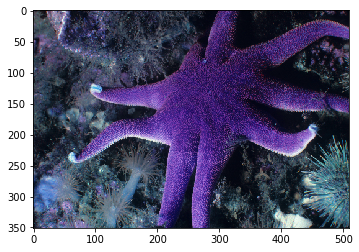

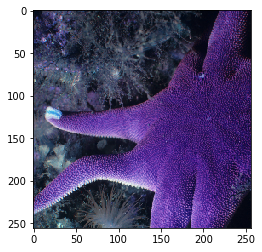

256
(256, 256)


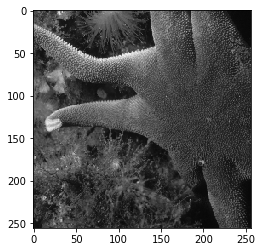

'\nimg = cv2.imread("../../DIV2K_train_HR/0001.png", cv2.IMREAD_GRAYSCALE)\nimg = cv2.resize(img, (256, 256))\nimg2 = cv2.imread("../../DIV2K_train_HR/0002.png", cv2.IMREAD_GRAYSCALE)\nimg2 = cv2.resize(img2, (256, 256))\nprint(SSIM(img, img2))\n'

In [6]:
"""
    Generating Noise image
"""
import random

rotation = 180

#https://github.com/GeorgeSeif/Semantic-Segmentation-Suite/blob/master/train.py
def random_crop(image, crop_height, crop_width):
    x = random.randint(0, image.shape[1]-crop_width)
    y = random.randint(0, image.shape[0]-crop_height)
    
    if len(image.shape) == 3:
        return image[y:y+crop_height, x:x+crop_width, :]
    else:
        return image[y:y+crop_height, x:x+crop_width, :]

def data_augmentation(input_image):
    # Data augmentation
    input_image = random_crop(input_image, 256, 256)
    plt.imshow(input_image)
    plt.show()
    if random.randint(0,1):
        input_image = cv2.flip(input_image, 1)
    if random.randint(0,1):
        input_image = cv2.flip(input_image, 0)
    print(input_image.shape[1])
    if False:
        angle = random.uniform(-1*rotation, rotation)
        M = cv2.getRotationMatrix2D((input_image.shape[1]//2, input_image.shape[0]//2), angle, 1.0)
        input_image = cv2.warpAffine(input_image, M, (input_image.shape[1], input_image.shape[0]), flags=cv2.INTER_NEAREST)
        
    return input_image


#cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../DIV2K_train_HR/" + picture + ".png")
    print(img.shape)
    img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4) )
    plt.imshow(img)
    plt.show()
    img = data_augmentation(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(img.shape)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.show()
    #cv2.imwrite('output.jpg', img)
    break;
"""
img = cv2.imread("../../DIV2K_train_HR/0001.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
img2 = cv2.imread("../../DIV2K_train_HR/0002.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (256, 256))
print(SSIM(img, img2))
"""

    

In [7]:
"""
    Adding noise to image
"""
import random 

print(X_data.shape)

# 50%, 60%, 70%, 80%, 90%
img_size = 256*256

X_50 = np.zeros((800, img_size))
X_60 = np.zeros((800, img_size))
X_70 = np.zeros((800, img_size))
X_80 = np.zeros((800, img_size))
X_90 = np.zeros((800, img_size))

for i in range(len(X_train)): 
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size* 0.5)) 
    ran_seq2 = random.sample([n for n in range(img_size)], np.int(img_size* 0.6)) 
    ran_seq3 = random.sample([n for n in range(img_size)], np.int(img_size* 0.7))
    ran_seq4 = random.sample([n for n in range(img_size)], np.int(img_size* 0.8)) 
    ran_seq5 = random.sample([n for n in range(img_size)], np.int(img_size* 0.9)) 
    X_50[i] = X_data[i].reshape(-1, img_size) 
    X_60[i] = np.copy(X_50[i])
    X_70[i] = np.copy(X_50[i])
    X_80[i] = np.copy(X_50[i])
    X_90[i] = np.copy(X_50[i])
    for index in ran_seq:
        if random.randint(0,1):
            X_50[i][index] = 255
        else:
            X_50[i][index] = 0

    for index in ran_seq2:
        if random.randint(0,1):
            X_60[i][index] = 255
        else:
            X_60[i][index] = 0
            
    for index in ran_seq3:
        if random.randint(0,1):
            X_70[i][index] = 255
        else:
            X_70[i][index] = 0

    for index in ran_seq4:
        if random.randint(0,1):
            X_80[i][index] = 255
        else:
            X_80[i][index] = 0
            
    for index in ran_seq5:
        if random.randint(0,1):
            X_90[i][index] = 255
        else:
            X_90[i][index] = 0
            
    #cv2.imwrite('output.jpg', X_50[i])
    #cv2.imwrite('output.jpg', X_60[i])
    #cv2.imwrite('output.jpg', X_70[i])
    #cv2.imwrite('output.jpg', X_80[i])
    #cv2.imwrite('output.jpg', X_90[i])
    

NameError: name 'X_data' is not defined

In [2]:
"""
    Peak Signal-to-Noise Ratio:
         > 40dB: great
        30~40dB: good
        20~30dB: bad
         < 20dB: worse
"""
def PSNR(y_true, y_pred):
    return -10. * np.log10(np.mean(np.square(y_pred - y_true)))

def SSIM(img1, img2):
    return compare_ssim(img1, img2)

def printHistory(history): 
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [9]:
"""
    preprocessing data for keras(tf backend)
"""
# reshape the data based on what backend is in use (TensorFlow or Thean)
X_50 = X_50.reshape(-1, 256, 256, 1)
X_60 = X_60.reshape(-1, 256, 256, 1)
X_70 = X_70.reshape(-1, 256, 256, 1)
X_80 = X_80.reshape(-1, 256, 256, 1)
X_90 = X_90.reshape(-1, 256, 256, 1)

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_50 = X_50.astype('float32') / 255
X_60 = X_60.astype('float32') / 255
X_70 = X_70.astype('float32') / 255
X_80 = X_80.astype('float32') / 255
X_90 = X_90.astype('float32') / 255

X_train_50, X_test_50, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)
X_train_60, X_test_60, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)
X_train_70, X_test_70, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)
X_train_80, X_test_80, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)
X_train_90, X_test_90, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)

NameError: name 'X_50' is not defined

In [13]:
# create the CNN model
def SRCNN(pretrained_weights=None):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(256, 256, 1),padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(1, (3, 3), activation='relu', padding="same"))

    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])

    if(pretrained_weights):
            model.load_weights(pretrained_weights)

    return model

model = SRCNN()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 256, 1)       577       
Total params: 112,001
Trainable params: 112,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
modelCheck = ModelCheckpoint('SRCNN{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

In [ ]:
print("== SRCNN accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)